In [ ]:
from keras.layers import Conv2D, Flatten, Dense, MaxPooling2D
from keras.models import Sequential
from keras.optimizers import Adam
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

train, test = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
train

(array([[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        ...,
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],

In [ ]:
X_train, y_train = train[0], train[1]

In [ ]:
X_test, y_test = test[0], test[1]

In [ ]:
X_test

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

In [ ]:
X_train = X_train/255.0
X_test = X_test/255.0

In [ ]:
X_train.shape

(60000, 28, 28, 1)

Text(0.5, 1.0, 'Test set: 0')

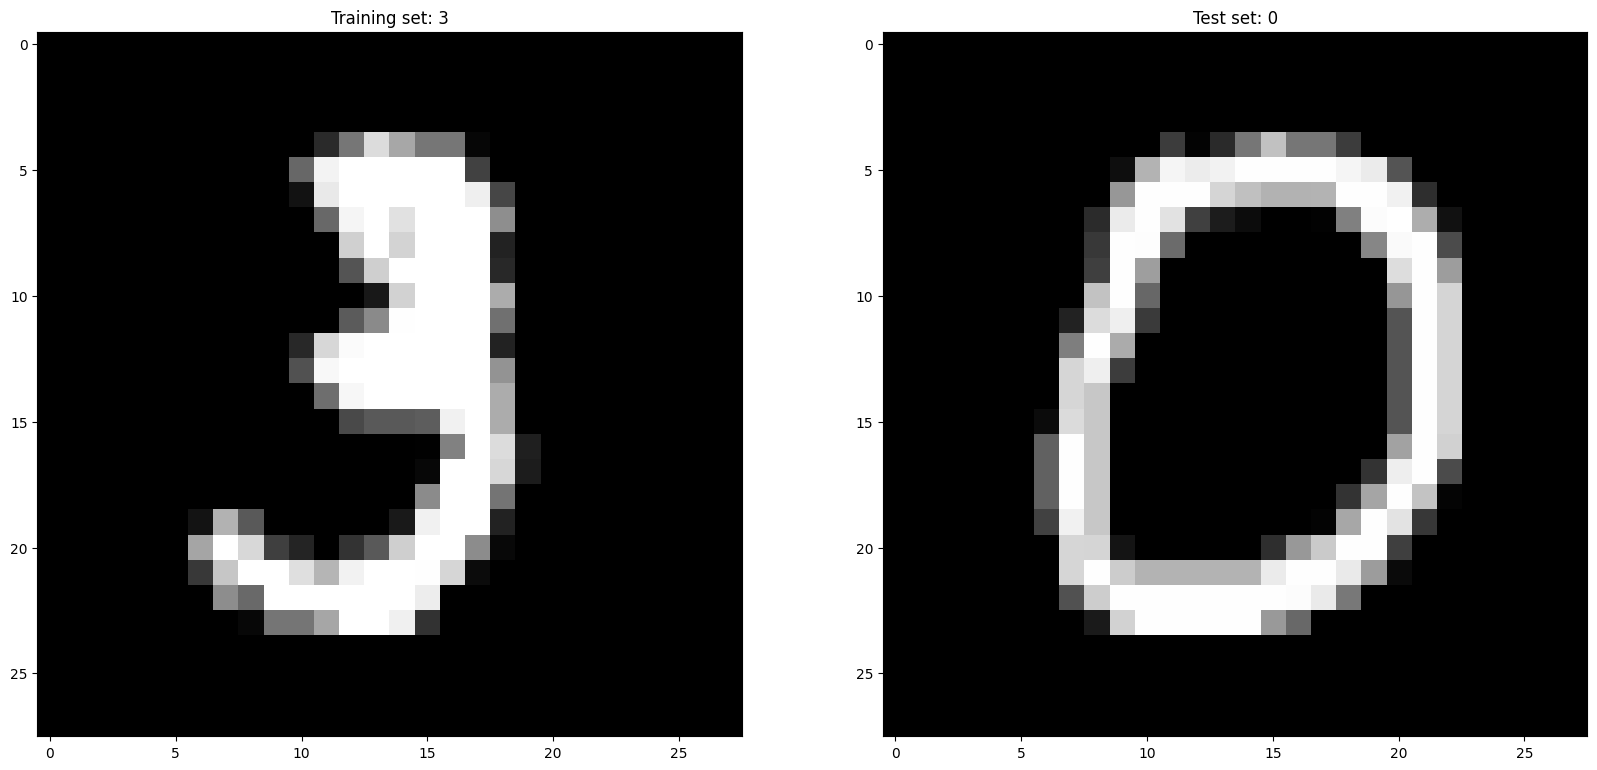

In [ ]:
num = 10
fig, ax = plt.subplots(1,2, figsize=(20,20))
ax[0].imshow(X_train[num], cmap=plt.get_cmap('gray'))
ax[0].set_title('Training set: ' + str(y_train[num]))

ax[1].imshow(X_test[num], cmap=plt.get_cmap('gray'))
ax[1].set_title('Test set: ' + str(y_test[num]))

In [ ]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [ ]:
class_cnt = np.unique(y_train).shape[0]
class_cnt

10

In [ ]:
filter_cnt = 32
learning_rate = 0.003
act_func = 'relu'
kernel = (3,3)

In [ ]:
model = Sequential()
conv_rule = 'same'

In [ ]:
X_train.shape[1:]

(28, 28, 1)

In [ ]:
X_train[0].shape

(28, 28, 1)

In [ ]:
model.add(
    Conv2D(input_shape = X_train.shape[1:],
                 filters=filter_cnt,
                 kernel_size=kernel,
                 padding=conv_rule,
                 activation=act_func)
    )
model.add(Conv2D(filters=filter_cnt,
                 kernel_size=kernel,
               padding=conv_rule,
               activation=act_func))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(filters=filter_cnt,
                 kernel_size=kernel,
               padding=conv_rule,
               activation=act_func))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(class_cnt, activation='softmax'))
model.compile(optimizer=Adam(learning_rate),
              loss='SparseCategoricalCrossentropy',
              metrics='accuracy')

In [ ]:
model.fit(x = X_train, y = y_train,
 epochs = class_cnt ,
 validation_data=(X_test, y_test))


Epoch 1/10
1875/1875 [==============================] - 18s 5ms/step - loss: 0.1064 - accuracy: 0.9672 - val_loss: 0.0461 - val_accuracy: 0.9842
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0456 - accuracy: 0.9862 - val_loss: 0.0422 - val_accuracy: 0.9852
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0331 - accuracy: 0.9898 - val_loss: 0.0302 - val_accuracy: 0.9907
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0272 - accuracy: 0.9917 - val_loss: 0.0464 - val_accuracy: 0.9873
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0225 - accuracy: 0.9927 - val_loss: 0.0388 - val_accuracy: 0.9891
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0190 - accuracy: 0.9941 - val_loss: 0.0294 - val_accuracy: 0.9923
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0180 - accuracy: 0.9942 - val_loss: 0.0436 - val_accuracy

In [ ]:
model0 = Sequential()
conv_rule = 'same'
model0.add(
    Conv2D(input_shape = X_train.shape[1:],
                 filters=filter_cnt,
                 kernel_size=kernel,
                 padding=conv_rule,
                 activation=act_func)
    )
model0.add(Conv2D(filters=filter_cnt,
                 kernel_size=kernel,
               padding=conv_rule,
               activation=act_func))
model0.add(MaxPooling2D((2,2)))
model0.add(Conv2D(filters=filter_cnt,
                 kernel_size=kernel,
               padding=conv_rule,
               activation=act_func))
model0.add(MaxPooling2D((2,2)))
model0.add(Flatten())
model0.add(Dense(class_cnt, activation='softmax'))
model0.compile(optimizer=Adam(learning_rate),
              loss='SparseCategoricalCrossentropy',
              metrics='accuracy')
model0.fit(x = X_train, y = y_train,
 epochs = 7 ,
 validation_data=(X_test, y_test))

Epoch 1/7
1875/1875 [==============================] - 11s 5ms/step - loss: 0.1131 - accuracy: 0.9648 - val_loss: 0.0577 - val_accuracy: 0.9829
Epoch 2/7
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0447 - accuracy: 0.9863 - val_loss: 0.0469 - val_accuracy: 0.9856
Epoch 3/7
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0352 - accuracy: 0.9887 - val_loss: 0.0391 - val_accuracy: 0.9875
Epoch 4/7
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0281 - accuracy: 0.9916 - val_loss: 0.0344 - val_accuracy: 0.9901
Epoch 5/7
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0236 - accuracy: 0.9925 - val_loss: 0.0275 - val_accuracy: 0.9919
Epoch 6/7
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0205 - accuracy: 0.9930 - val_loss: 0.0328 - val_accuracy: 0.9905
Epoch 7/7
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0190 - accuracy: 0.9937 - val_loss: 0.0304 - val_accuracy: 0.99